In [1]:
#dont run the first 7 lines
#Loading the data of Financial News from Json files into pandas dataframe
#import os
#import pandas as pd
#import json
#january
#path_to_json = '/Users/emreovey/Downloads/us-financial-news-articles/2018_01_112b52537b67659ad3609a234388c50a'
#json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
#jsons_data = pd.DataFrame(columns=['text','published','title'])
#for index, js in enumerate(json_files):
#    with open(os.path.join(path_to_json, js)) as json_file:
#        json_text = json.load(json_file)
#        text = json_text['text']
#        published = json_text['published']
#        title= json_text['title']
#        jsons_data.loc[index]=[text,published,title]
#jsons_data['published'] = pd.to_datetime(jsons_data['published'])
#jsons_data['text'] = jsons_data.text.astype(str)

In [2]:
#february
#path_to_json1 = '/Users/emreovey/Downloads/us-financial-news-articles/2018_02_112b52537b67659ad3609a234388c50a'
#json_files1 = [pos_json for pos_json in os.listdir(path_to_json1) if pos_json.endswith('.json')]
#jsons_data1= pd.DataFrame(columns=['text','published','title'])
#for index, js in enumerate(json_files1):
#    with open(os.path.join(path_to_json1, js)) as json_file:
#        json_text = json.load(json_file)
#        text = json_text['text']
#        published = json_text['published']
#        title= json_text['title']
#        jsons_data1.loc[index]=[text,published,title]
#jsons_data1['published'] = pd.to_datetime(jsons_data1['published'])
#jsons_data1['text'] = jsons_data1.text.astype(str)

In [3]:
#march
#path_to_json2 = '/Users/emreovey/Downloads/us-financial-news-articles/2018_03_112b52537b67659ad3609a234388c50a'
#json_files2 = [pos_json for pos_json in os.listdir(path_to_json2) if pos_json.endswith('.json')]
#jsons_data2 = pd.DataFrame(columns=['text','published','title'])
#for index, js in enumerate(json_files2):
#    with open(os.path.join(path_to_json2, js)) as json_file:
#        json_text = json.load(json_file)
#        text = json_text['text']
#        published = json_text['published']
#        title= json_text['title']
#        jsons_data2.loc[index]=[text,published,title]
#jsons_data2['published'] = pd.to_datetime(jsons_data2['published'])
#jsons_data2['text'] = jsons_data2.text.astype(str)



In [4]:
#april
#path_to_json3 = '/Users/emreovey/Downloads/us-financial-news-articles/2018_04_112b52537b67659ad3609a234388c50a'
#json_files3 = [pos_json for pos_json in os.listdir(path_to_json3) if pos_json.endswith('.json')]
#jsons_data3 = pd.DataFrame(columns=['text','published','title'])
#for index, js in enumerate(json_files3):
#    with open(os.path.join(path_to_json3, js)) as json_file:
#        json_text = json.load(json_file)
#        text = json_text['text']
#        published = json_text['published']
#        title= json_text['title']
#        jsons_data3.loc[index]=[text,published,title]
#jsons_data3['published'] = pd.to_datetime(jsons_data3['published'])
#jsons_data3['text'] = jsons_data3.text.astype(str)

In [5]:
#may
#path_to_json4 = '/Users/emreovey/Downloads/us-financial-news-articles/2018_05_112b52537b67659ad3609a234388c50a'
#json_files4 = [pos_json for pos_json in os.listdir(path_to_json4) if pos_json.endswith('.json')]
#jsons_data4 = pd.DataFrame(columns=['text','published','title'])
#for index, js in enumerate(json_files4):
#    with open(os.path.join(path_to_json4, js)) as json_file:
#        json_text = json.load(json_file)
#        text = json_text['text']
#        published = json_text['published']
#        title= json_text['title']
#        jsons_data4.loc[index]=[text,published,title]
#jsons_data4['published'] = pd.to_datetime(jsons_data4['published'])
#jsons_data4['text'] = jsons_data4.text.astype(str)

In [6]:
#join all the months in one dataframe
#datas=[jsons_data,jsons_data1,jsons_data2,jsons_data3,jsons_data4]
#jsons_data = pd.concat(datas)
#jsons_data['published'] = pd.to_datetime(jsons_data['published'],utc=True)
#jsons_data['text'] = jsons_data.text.astype(str)

In [7]:
#Please start running the code from this line
#Creating the sparks session and sqlcontext
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark.sql import SQLContext
spark = SparkSession.builder.appName('sentiment').getOrCreate()
sqlContext = SQLContext(spark)
print(sqlContext)

In [8]:
 import pandas as pd
#Loading the master sentiment dictionary from Laughran and McDonald
sentiment= pd.read_csv('/Users/emreovey/Desktop/LoughranMcDonald_MasterDictionary_2018.csv')
sentiment['Word'] = sentiment['Word'].str.lower()
#Select only negative words and add a score of -1
sentiment_neg = sentiment[sentiment['Negative']>0]
sentiment_neg=sentiment_neg['Word']
sentiment_neg=sentiment_neg.to_frame() #convert to pandas dataframe
sentiment_neg['Score']= -1 #add a score of -1
#Select only positive words and add a score of 1
sentiment_pos=sentiment[sentiment['Positive']>0]
sentiment_pos=sentiment_pos['Word']
sentiment_pos=sentiment_pos.to_frame() #convert to pandas dataframe
sentiment_pos['Score']= 1 #add a score of 1
dfs=[sentiment_neg, sentiment_pos]
sentiment = pd.concat(dfs)

In [9]:
from pyspark.sql import functions as fn
sentiments_df= sqlContext.createDataFrame(sentiment)
from pyspark.sql import functions as fn
# a sample of positive words
sentiments_df.where(fn.col('Score') == 1).show(5)
# a sample of negative words
sentiments_df.where(fn.col('Score') == -1).show(5)

+----------+-----+
|      Word|Score|
+----------+-----+
|      able|    1|
| abundance|    1|
|  abundant|    1|
| acclaimed|    1|
|accomplish|    1|
+----------+-----+
only showing top 5 rows

+------------+-----+
|        Word|Score|
+------------+-----+
|     abandon|   -1|
|   abandoned|   -1|
|  abandoning|   -1|
| abandonment|   -1|
|abandonments|   -1|
+------------+-----+
only showing top 5 rows



In [10]:
#Getting the news about individual companies of FAMGA
#import pandas as pd
#microsoft_news=pd.DataFrame(jsons_data[jsons_data['text'].str.contains("Microsoft")])
#facebook_news=pd.DataFrame(jsons_data[jsons_data['text'].str.contains("Facebook")])
#google_news=pd.DataFrame(jsons_data[jsons_data['text'].str.contains("Google")])
#amazon_news=pd.DataFrame(jsons_data[jsons_data['text'].str.contains("Amazon")])
#apple_news=pd.DataFrame(jsons_data[jsons_data['text'].str.contains("Apple")])

In [11]:
#We write sentiment documents to csv because it takes too much time to load the json data all the time
#microsoft_news.to_csv(path_or_buf='/Users/emreovey/Desktop/company_news/microsoft_news.csv', sep=',',header=True)
#facebook_news.to_csv(path_or_buf='/Users/emreovey/Desktop/company_news/facebook_news.csv', sep=',',header=True)
#google_news.to_csv(path_or_buf='/Users/emreovey/Desktop/company_news/google_news.csv', sep=',',header=True)
#amazon_news.to_csv(path_or_buf='/Users/emreovey/Desktop/company_news/amazon_news.csv', sep=',',header=True)
#apple_news.to_csv(path_or_buf='/Users/emreovey/Desktop/company_news/apple_news.csv', sep=',',header=True)

In [12]:
#loading the dataframes of news which are filtered for companies
microsoft_news= pd.read_csv('/Users/emreovey/Desktop/company_news/microsoft_news.csv',sep=',')
facebook_news= pd.read_csv('/Users/emreovey/Desktop/company_news/facebook_news.csv',sep=',')
google_news= pd.read_csv('/Users/emreovey/Desktop/company_news/google_news.csv',sep=',')
amazon_news= pd.read_csv('/Users/emreovey/Desktop/company_news/amazon_news.csv',sep=',')
apple_news= pd.read_csv('/Users/emreovey/Desktop/company_news/apple_news.csv',sep=',')

In [13]:
#converting the dataframes into sparkdataframe
import pyspark
microsoft= sqlContext.createDataFrame(microsoft_news)
facebook=sqlContext.createDataFrame(facebook_news)
google=sqlContext.createDataFrame(google_news)
amazon=sqlContext.createDataFrame(amazon_news)
apple=sqlContext.createDataFrame(apple_news)


In [14]:
#deleting punctuation from the text
import string
import re
def remove_punct(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub("", text)  
    return nopunct

In [15]:
#cont'd deleting punctuation
#microsoft
from pyspark.sql.functions import udf
punct_remover = udf(lambda x: remove_punct(x))
microsoft=microsoft.select(punct_remover('text'),'title','published')
microsoft= microsoft.withColumnRenamed('<lambda>(text)', 'text')
#facebook
facebook=facebook.select(punct_remover('text'),'title','published')
facebook= facebook.withColumnRenamed('<lambda>(text)', 'text')
#google
google=google.select(punct_remover('text'),'title','published')
google= google.withColumnRenamed('<lambda>(text)', 'text')
#amazon
amazon=amazon.select(punct_remover('text'),'title','published')
amazon= amazon.withColumnRenamed('<lambda>(text)', 'text')
#apple
apple=apple.select(punct_remover('text'),'title','published')
apple= apple.withColumnRenamed('<lambda>(text)', 'text')

In [16]:
#Tokenization and removal of stop words
from pyspark.ml import *
from pyspark.ml.feature import Tokenizer, RegexTokenizer, StopWordsRemover
#######microsoft#######
#tokenizer and stop word remover
tok = Tokenizer(inputCol="text", outputCol="words")
#stop word remover
locale = spark._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))
stopwordrm = StopWordsRemover(inputCol='words', outputCol='words_nsw')
# Build the pipeline 
pipeline = Pipeline(stages=[tok, stopwordrm])
# Fit the pipeline 
mic_tokenized = pipeline.fit(microsoft).transform(microsoft)
######facebook#######
#tokenizer and stop word remover
tok = Tokenizer(inputCol="text", outputCol="words")
#stop word remover
locale = spark._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))
stopwordrm = StopWordsRemover(inputCol='words', outputCol='words_nsw')
# Build the pipeline 
pipeline = Pipeline(stages=[tok, stopwordrm])
# Fit the pipeline 
facebook_tokenized = pipeline.fit(facebook).transform(facebook)
#####google######
#tokenizer and stop word remover
tok = Tokenizer(inputCol="text", outputCol="words")
#stop word remover
locale = spark._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))
stopwordrm = StopWordsRemover(inputCol='words', outputCol='words_nsw')
# Build the pipeline 
pipeline = Pipeline(stages=[tok, stopwordrm])
# Fit the pipeline 
google_tokenized = pipeline.fit(google).transform(google)
#####amazon######
#tokenizer and stop word remover
tok = Tokenizer(inputCol="text", outputCol="words")
#stop word remover
locale = spark._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))
stopwordrm = StopWordsRemover(inputCol='words', outputCol='words_nsw')
# Build the pipeline 
pipeline = Pipeline(stages=[tok, stopwordrm])
# Fit the pipeline 
amazon_tokenized = pipeline.fit(amazon).transform(amazon)
#####apple#######
#tokenizer and stop word remover
tok = Tokenizer(inputCol="text", outputCol="words")
#stop word remover
locale = spark._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))
stopwordrm = StopWordsRemover(inputCol='words', outputCol='words_nsw')
# Build the pipeline 
pipeline = Pipeline(stages=[tok, stopwordrm])
# Fit the pipeline 
apple_tokenized = pipeline.fit(apple).transform(apple)

In [17]:
#Lemmatization of the text
import nltk
from nltk.stem import WordNetLemmatizer 
# Instantiate lemmatizer object
lemmatizer = WordNetLemmatizer()
# Create lemmatizer python function
def lemma(in_vec):
    out_vec = []
    for t in in_vec:
        t_stem = lemmatizer.lemmatize(t)
        if len(t_stem) > 2:
            out_vec.append(t_stem)       
    return out_vec
#define udf of lemmatizer 
from pyspark.sql.types import *
lemmatizer_udf = udf(lambda x: lemma(x), ArrayType(StringType()))
# New dataframe containing the lemmatized tokens 
#apple
apple_tokenized = (
    apple_tokenized
        .withColumn("words_nsw", lemmatizer_udf("words_nsw"))
        .select("words_nsw","published"))
#google
google_tokenized = (
    google_tokenized
        .withColumn("words_nsw", lemmatizer_udf("words_nsw"))
        .select("words_nsw","published"))
#microsoft
mic_tokenized = (
    mic_tokenized
        .withColumn("words_nsw", lemmatizer_udf("words_nsw"))
        .select("words_nsw","published"))
#facebook
facebook_tokenized = (
    facebook_tokenized
        .withColumn("words_nsw", lemmatizer_udf("words_nsw"))
        .select("words_nsw","published"))
#amazon
amazon_tokenized = (
    amazon_tokenized
        .withColumn("words_nsw", lemmatizer_udf("words_nsw"))
        .select("words_nsw","published"))


In [18]:
#Stemming in the text of news
# Import stemmer library
#from nltk.stem.porter import *

# Instantiate stemmer object
#stemmer = PorterStemmer()
# Create stemmer python function
#def stem(in_vec):
#    out_vec = []
#    for t in in_vec:
#        t_stem = stemmer.stem(t)
#        if len(t_stem) > 2:
#            out_vec.append(t_stem)       
#    return out_vec

# Create udf Array<String>
#from pyspark.sql.types import *
#stemmer_udf = udf(lambda x: stem(x), ArrayType(StringType()))

# New dataframe containing the stemmed tokens 
#apple
#apple_tokenized = (
#    apple_tokenized
#        .withColumn("words_nsw", stemmer_udf("words_nsw"))
#        .select("words_nsw","published"))
#google
#google_tokenized = (
#    google_tokenized
#        .withColumn("words_nsw", stemmer_udf("words_nsw"))
#        .select("words_nsw","published"))
#microsoft
#mic_tokenized = (
#    mic_tokenized
#        .withColumn("words_nsw", stemmer_udf("words_nsw"))
#        .select("words_nsw","published"))
#facebook
#facebook_tokenized = (
#    facebook_tokenized
#        .withColumn("words_nsw", stemmer_udf("words_nsw"))
#        .select("words_nsw","published"))
#amazon
#amazon_tokenized = (
#    amazon_tokenized
#        .withColumn("words_nsw", stemmer_udf("words_nsw"))
#        .select("words_nsw","published"))

In [19]:
#add an id to every financial news
from pyspark.sql.functions import monotonically_increasing_id

#microsoft
mic_tokenized = mic_tokenized.withColumn("id", monotonically_increasing_id())
#facebook
facebook_tokenized = facebook_tokenized.withColumn("id", monotonically_increasing_id())
#google
google_tokenized = google_tokenized.withColumn("id", monotonically_increasing_id())
#amazon
amazon_tokenized = amazon_tokenized.withColumn("id", monotonically_increasing_id())
#apple
apple_tokenized = apple_tokenized.withColumn("id", monotonically_increasing_id())

In [20]:
#creating the sentiment dataframe of matching words
#microsoft
mic_word_sent = mic_tokenized.\
    select('id','published',fn.explode('words_nsw').alias('Word')).\
    join(sentiments_df, 'Word')
#facebook
facebook_word_sent = facebook_tokenized.\
    select('id','published',fn.explode('words_nsw').alias('Word')).\
    join(sentiments_df, 'Word')
#google
google_word_sent = google_tokenized.\
    select('id','published',fn.explode('words_nsw').alias('Word')).\
    join(sentiments_df, 'Word')
#amazon
amazon_word_sent = amazon_tokenized.\
    select('id','published',fn.explode('words_nsw').alias('Word')).\
    join(sentiments_df, 'Word')
#apple
apple_word_sent = apple_tokenized.\
    select('id','published',fn.explode('words_nsw').alias('Word')).\
    join(sentiments_df, 'Word')

In [21]:
#calculating the average sentiment per document of the news with the matching words
#microsoft
mic_sentiment = mic_word_sent.\
    groupBy('id').\
    agg(fn.avg('Score').alias('avg_sentiment'))
#facebook
facebook_sentiment = facebook_word_sent.\
    groupBy('id').\
    agg(fn.avg('Score').alias('avg_sentiment'))
#google
google_sentiment = google_word_sent.\
    groupBy('id').\
    agg(fn.avg('Score').alias('avg_sentiment'))
#amazon
amazon_sentiment = amazon_word_sent.\
    groupBy('id').\
    agg(fn.avg('Score').alias('avg_sentiment'))
#apple
apple_sentiment = apple_word_sent.\
    groupBy('id').\
    agg(fn.avg('Score').alias('avg_sentiment'))

In [22]:
#labelling the news which do not match with a sentiment score of 0
#Uniting the not matching data frame with sentiment dataframe
from functools import reduce  
from pyspark.sql import DataFrame
def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)
#microsoft
aa=mic_tokenized.toPandas()
bb=mic_sentiment.toPandas()
mic_notmatching= aa[pd.merge(bb, aa, how='outer').isnull().any(axis=1)]
mic_notmatching=mic_notmatching[['id']]
mic_notmatching['avg_sentiment']=0
mic_notmatching=sqlContext.createDataFrame(mic_notmatching)
#Uniting the not matching data frame with sentiment dataframe
mic_sentiment=unionAll(mic_sentiment, mic_notmatching)
#facebook
cc=facebook_tokenized.toPandas()
dd=facebook_sentiment.toPandas()
facebook_notmatching= cc[pd.merge(dd, cc, how='outer').isnull().any(axis=1)]
facebook_notmatching=facebook_notmatching[['id']]
facebook_notmatching['avg_sentiment']=0
facebook_notmatching=sqlContext.createDataFrame(facebook_notmatching)
#Uniting the not matching data frame with sentiment dataframe
facebook_sentiment=unionAll(facebook_sentiment, facebook_notmatching)

#google
ee=google_tokenized.toPandas()
ff=google_sentiment.toPandas()
google_notmatching= ee[pd.merge(ff, ee, how='outer').isnull().any(axis=1)]
google_notmatching=google_notmatching[['id']]
google_notmatching['avg_sentiment']=0
google_notmatching=sqlContext.createDataFrame(google_notmatching)
#Uniting the not matching data frame with sentiment dataframe
google_sentiment=unionAll(google_sentiment, google_notmatching)

#amazon
gg=amazon_tokenized.toPandas()
hh=amazon_sentiment.toPandas()
amazon_notmatching= gg[pd.merge(hh, gg, how='outer').isnull().any(axis=1)]
amazon_notmatching=amazon_notmatching[['id']]
amazon_notmatching['avg_sentiment']=0
amazon_notmatching=sqlContext.createDataFrame(amazon_notmatching)
#Uniting the not matching data frame with sentiment dataframe
amazon_sentiment=unionAll(amazon_sentiment, amazon_notmatching)
#apple
ii=apple_tokenized.toPandas()
kk=apple_sentiment.toPandas()
apple_notmatching= ii[pd.merge(kk, ii, how='outer').isnull().any(axis=1)]
apple_notmatching=apple_notmatching[['id']]
apple_notmatching['avg_sentiment']=0
apple_notmatching=sqlContext.createDataFrame(apple_notmatching)
#Uniting the not matching data frame with sentiment dataframe
apple_sentiment=unionAll(apple_sentiment, apple_notmatching)


In [23]:
#number of the news per companies
#microsoft
print(mic_sentiment.count())
#facebook
print(facebook_sentiment.count())
#google
print(google_sentiment.count())
#apple
print(apple_sentiment.count())
#amazon
print(amazon_sentiment.count())

2552
12500
5196
5845
6786


In [24]:
#joining the dataframes in order to get the publishing timestamp of the news
#microsoft
mic_final=mic_sentiment.join(mic_tokenized, mic_sentiment.id 
                             == mic_tokenized.id).select(mic_sentiment["id"],
                                mic_sentiment["avg_sentiment"],
                                                         mic_tokenized["published"])
#facebook
facebook_final=facebook_sentiment.join(facebook_tokenized, facebook_sentiment.id 
                        == facebook_tokenized.id).select(facebook_sentiment["id"],
                            facebook_sentiment["avg_sentiment"],facebook_tokenized["published"])
#google
google_final=google_sentiment.join(google_tokenized, google_sentiment.id
                                   == google_tokenized.id).select(google_sentiment["id"],
                                        google_sentiment["avg_sentiment"],
                                                    google_tokenized["published"])
#amazon
amazon_final=amazon_sentiment.join(amazon_tokenized, amazon_sentiment.id 
                                == amazon_tokenized.id).select(amazon_sentiment["id"],
                                        amazon_sentiment["avg_sentiment"],
                                                               amazon_tokenized["published"])
#apple
apple_final=apple_sentiment.join(apple_tokenized, apple_sentiment.id
                                 == apple_tokenized.id).select(apple_sentiment["id"],
                                        apple_sentiment["avg_sentiment"],
                                                apple_tokenized["published"])

In [25]:
#calculating the average daily sentiment per company 
#microsoft
from pyspark.sql import functions as fn
mic_final = mic_final.withColumn("date_only", fn.to_date(fn.col("published")))
microsoft_daily = mic_final.\
    groupBy('date_only').\
    agg(fn.avg('avg_sentiment').alias('daily_sentiment'))

#facebook
facebook_final = facebook_final.withColumn("date_only", fn.to_date(fn.col("published")))
facebook_daily = facebook_final.\
    groupBy('date_only').\
    agg(fn.avg('avg_sentiment').alias('daily_sentiment'))

#google
google_final = google_final.withColumn("date_only", fn.to_date(fn.col("published")))
google_daily = google_final.\
    groupBy('date_only').\
    agg(fn.avg('avg_sentiment').alias('daily_sentiment'))
#amazon
amazon_final = amazon_final.withColumn("date_only", fn.to_date(fn.col("published")))
amazon_daily = amazon_final.\
    groupBy('date_only').\
    agg(fn.avg('avg_sentiment').alias('daily_sentiment'))

#apple
apple_final = apple_final.withColumn("date_only", fn.to_date(fn.col("published")))
apple_daily = apple_final.\
    groupBy('date_only').\
    agg(fn.avg('avg_sentiment').alias('daily_sentiment'))


In [26]:
#Loading Stock Prices
google_stock= pd.read_csv('/Users/emreovey/Desktop/GOOGL_Historical_Data.csv')
google_stock= sqlContext.createDataFrame(google_stock)
facebook_stock= pd.read_csv('/Users/emreovey/Desktop/FB.csv')
facebook_stock= sqlContext.createDataFrame(facebook_stock)
amazon_stock=pd.read_csv('/Users/emreovey/Desktop/AMZN.csv')
amazon_stock=sqlContext.createDataFrame(amazon_stock)
microsoft_stock=pd.read_csv('/Users/emreovey/Desktop/MSFT.csv')
microsoft_stock=sqlContext.createDataFrame(microsoft_stock)
apple_stock=pd.read_csv('/Users/emreovey/Desktop/AAPL.csv')
apple_stock=sqlContext.createDataFrame(apple_stock)
#google_stock.set_index('Date', inplace=True)
#google_stock=google_stock['Close']
#google_stock.show(5)



In [27]:
#Joining dataframes of stocks and daily sentiments and converting to pd dataframe to eleminate closed days of stock market
#google
google_joined=google_daily.join(google_stock, google_daily.date_only == google_stock.Date).select(google_daily["date_only"],google_daily["daily_sentiment"],google_stock["Close"])
google_joined=google_joined.sort('date_only').toPandas()
google_joined= pd.DataFrame(google_joined)
#amazon
amazon_joined=amazon_daily.join(amazon_stock, amazon_daily.date_only == amazon_stock.Date).select(amazon_daily["date_only"],amazon_daily["daily_sentiment"],amazon_stock["Close"])
amazon_joined=amazon_joined.sort('date_only').toPandas()
amazon_joined= pd.DataFrame(amazon_joined)
#facebook
facebook_joined=facebook_daily.join(facebook_stock, facebook_daily.date_only == facebook_stock.Date).select(facebook_daily["date_only"],facebook_daily["daily_sentiment"],facebook_stock["Close"])
facebook_joined=facebook_joined.sort('date_only').toPandas()
facebook_joined= pd.DataFrame(facebook_joined)
#apple
apple_joined=apple_daily.join(apple_stock, apple_daily.date_only == apple_stock.Date).select(apple_daily["date_only"],apple_daily["daily_sentiment"],apple_stock["Close"])
apple_joined=apple_joined.sort('date_only').toPandas()
apple_joined= pd.DataFrame(apple_joined)
#microsoft
microsoft_joined=microsoft_daily.join(microsoft_stock, microsoft_daily.date_only == microsoft_stock.Date).select(microsoft_daily["date_only"],microsoft_daily["daily_sentiment"],microsoft_stock["Close"])
microsoft_joined=microsoft_joined.sort('date_only').toPandas()
microsoft_joined= pd.DataFrame(microsoft_joined)

In [28]:
import numpy as np
#google
#converting data type and setting the date as index
google_joined['date_only'] = pd.to_datetime(google_joined['date_only'])
google_joined = google_joined.set_index('date_only')

#dividing the data set into train and test
google_train_set, google_test_set= np.split(google_joined, [int(.80 *len(google_joined))])
len(google_train_set), len(google_test_set)
#amazon
#converting data type and setting the date as index
amazon_joined['date_only'] = pd.to_datetime(amazon_joined['date_only'])
amazon_joined = amazon_joined.set_index('date_only')

#dividing the data set into train and test
amazon_train_set, amazon_test_set= np.split(amazon_joined, [int(.80 *len(amazon_joined))])
len(amazon_train_set), len(amazon_test_set)
#facebook
#converting data type and setting the date as index
facebook_joined['date_only'] = pd.to_datetime(facebook_joined['date_only'])
facebook_joined = facebook_joined.set_index('date_only')

#dividing the data set into train and test
facebook_train_set, facebook_test_set= np.split(facebook_joined, [int(.80 *len(facebook_joined))])
len(facebook_train_set), len(facebook_test_set)
#apple
#converting data type and setting the date as index
apple_joined['date_only'] = pd.to_datetime(apple_joined['date_only'])
apple_joined = apple_joined.set_index('date_only')

#dividing the data set into train and test
apple_train_set, apple_test_set= np.split(apple_joined, [int(.80 *len(apple_joined))])
len(apple_train_set), len(apple_test_set)
#microsoft
#converting data type and setting the date as index
microsoft_joined['date_only'] = pd.to_datetime(microsoft_joined['date_only'])
microsoft_joined = microsoft_joined.set_index('date_only')

#dividing the data set into train and test
microsoft_train_set, microsoft_test_set= np.split(microsoft_joined, [int(.80 *len(microsoft_joined))])
len(microsoft_train_set), len(microsoft_test_set)

(83, 21)

In [29]:
#converting the sentiments into 2D numpy array 
import numpy as np
#google
a=google_train_set['daily_sentiment'].to_numpy()
google_train_sentiment= np.reshape(a, (-1, 1))
b=google_test_set['daily_sentiment'].to_numpy()
google_test_sentiment= np.reshape(b, (-1, 1))
#converting the sentiments into numpy array amazon
a=amazon_train_set['daily_sentiment'].to_numpy()
amazon_train_sentiment= np.reshape(a, (-1, 1))
b=amazon_test_set['daily_sentiment'].to_numpy()
amazon_test_sentiment= np.reshape(b, (-1, 1))
#converting the sentiments into numpy array apple
a=apple_train_set['daily_sentiment'].to_numpy()
apple_train_sentiment= np.reshape(a, (-1, 1))
b=apple_test_set['daily_sentiment'].to_numpy()
apple_test_sentiment= np.reshape(b, (-1, 1))
#converting the sentiments into numpy array microsoft
a=microsoft_train_set['daily_sentiment'].to_numpy()
microsoft_train_sentiment= np.reshape(a, (-1, 1))
b=microsoft_test_set['daily_sentiment'].to_numpy()
microsoft_test_sentiment= np.reshape(b, (-1, 1))
#converting the sentiments into numpy array facebook
a=facebook_train_set['daily_sentiment'].to_numpy()
facebook_train_sentiment= np.reshape(a, (-1, 1))
b=facebook_test_set['daily_sentiment'].to_numpy()
facebook_test_sentiment= np.reshape(b, (-1, 1))

In [30]:
#######Predictive models built for companies ########## 
#building the arima model for facebook
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(facebook_train_set['Close'].as_matrix(), 
                            start_p=1, start_q=1,d=0,
                            max_p=3, max_q=3, stepwise=True,
                            trace=True,error_action='ignore',suppress_warnings=True)
print(stepwise_model.aic())
#training the model
model_fit=stepwise_model.fit(apple_train_set['Close'],exogenous=facebook_train_sentiment)
#making predictions
forecast_facebook= model_fit.predict(n_periods=21,exogenous=facebook_test_sentiment)
from sklearn import metrics
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(facebook_test_set['Close'],forecast_facebook)))
#mape calculation
#function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))*100 
#calculation
print(mean_absolute_percentage_error(facebook_test_set['Close'], forecast_facebook))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=472.096, BIC=481.772, Fit time=0.084 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=631.086, BIC=635.924, Fit time=0.007 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=470.121, BIC=477.377, Fit time=0.047 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=549.246, BIC=556.503, Fit time=0.041 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=472.103, BIC=481.779, Fit time=0.105 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.287 seconds
470.12097491898874
13.867510226831687
7.174441508885791


In [31]:
#SVR Prediction 
#facebook
from sklearn.svm import SVR
import cufflinks as cf
from sklearn.model_selection import GridSearchCV
#creating the matrix of parameters that will be used in GridSearchCV
parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
#defining the gridsearch function with the parameters
svr = SVR()
clf = GridSearchCV(svr, parameters,cv=10)
#training the model
facebook_model=clf.fit(facebook_train_sentiment,facebook_train_set['Close'])
#making predictions
facebook_results=facebook_model.predict(facebook_test_sentiment)
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(facebook_test_set['Close'],facebook_results)))
#mape
print(mean_absolute_percentage_error(facebook_test_set['Close'], facebook_results))
clf.best_params_

11.629846452493029
5.538132435221818


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'C': 10000, 'gamma': 0.6, 'kernel': 'sigmoid'}

In [32]:
#Predicting with Linear Reg. facebook
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#creating the matrix of parameters that will be used in GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
#defining the gridsearch function with the parameters
facebook_grid = GridSearchCV(model,parameters, cv=10)
#training the model
facebook_fit=facebook_grid.fit(facebook_train_sentiment,facebook_train_set['Close'])
#making predictions
facebook_predictions = facebook_fit.predict(facebook_test_sentiment)
from sklearn import metrics
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(facebook_test_set['Close'],facebook_predictions)))
#mape
print(mean_absolute_percentage_error(facebook_test_set['Close'], facebook_predictions))
facebook_grid.best_params_

10.221733078147139
4.8682630679654695


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [33]:
#building the arima model for apple
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(apple_train_set['Close'].as_matrix(), 
                            start_p=1, start_q=1,d=0,
                            max_p=3, max_q=3, stepwise=True,
                            trace=True,error_action='ignore',suppress_warnings=True)
print(stepwise_model.aic())
#training the model
model_fit=stepwise_model.fit(apple_train_set['Close'],exogenous=apple_train_sentiment)
#making predictions
forecast_apple = model_fit.predict(n_periods=21,exogenous=apple_test_sentiment)
from sklearn import metrics
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(apple_test_set['Close'],forecast_apple)))
#mape calculation
print(mean_absolute_percentage_error(apple_test_set['Close'], forecast_apple))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=407.851, BIC=417.527, Fit time=0.129 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=536.983, BIC=541.820, Fit time=0.005 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=408.276, BIC=415.532, Fit time=0.018 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=465.618, BIC=472.875, Fit time=0.022 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=409.740, BIC=421.835, Fit time=0.138 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=409.420, BIC=421.514, Fit time=0.111 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=411.323, BIC=425.836, Fit time=0.185 seconds
Total fit time: 0.610 seconds
407.85124862700263
13.550641573310553
6.950786385419275


In [34]:
#SVR Prediction
#apple
from sklearn.svm import SVR
import cufflinks as cf
from sklearn.model_selection import GridSearchCV
#creating the matrix of parameters that will be used in GridSearchCV
parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
#defining the gridsearch function with the parameters
svr = SVR()
clf = GridSearchCV(svr, parameters,cv=10)
#training the model
apple_model=clf.fit(apple_train_sentiment,apple_train_set['Close'])
#making predictions
apple_results=apple_model.predict(apple_test_sentiment)
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(apple_test_set['Close'],apple_results)))
#mape
print(mean_absolute_percentage_error(apple_test_set['Close'], apple_results))
clf.best_params_

13.968379057944086
7.2448766170422605


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'C': 1, 'gamma': 0.6, 'kernel': 'sigmoid'}

In [35]:
#Predicting with Linear Reg. apple
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#creating the matrix of parameters that will be used in GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
#defining the gridsearch function with the parameters
apple_grid = GridSearchCV(model,parameters, cv=10)
#training the model
apple_fit=apple_grid.fit(apple_train_sentiment,apple_train_set['Close'])
#making predictions
apple_predictions = apple_fit.predict(apple_test_sentiment)
from sklearn import metrics
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(apple_test_set['Close'],apple_predictions)))
#mape
print(mean_absolute_percentage_error(apple_test_set['Close'], apple_predictions))
apple_grid.best_params_

13.166696969898913
6.750881768325255


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [36]:
#building the arima model for microsoft
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(microsoft_train_set['Close'].as_matrix(), 
                            start_p=1, start_q=1,d=1,
                            max_p=3, max_q=3, stepwise=True,
                            trace=True,error_action='ignore',suppress_warnings=True,
                            )
print(stepwise_model.aic())
#training the model
model_fit=stepwise_model.fit(microsoft_train_set['Close'],exogenous=microsoft_train_sentiment)
#making predictions
forecast_microsoft = model_fit.predict(n_periods=21,exogenous=microsoft_test_sentiment)
from sklearn import metrics
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(microsoft_test_set['Close'],forecast_microsoft)))
#mape calculation
print(mean_absolute_percentage_error(microsoft_test_set['Close'], forecast_microsoft))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=324.746, BIC=334.373, Fit time=0.049 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=329.804, BIC=334.617, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=326.757, BIC=333.977, Fit time=0.028 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=323.107, BIC=330.327, Fit time=0.024 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=323.764, BIC=333.391, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=323.349, BIC=335.383, Fit time=0.060 seconds
Total fit time: 0.208 seconds
323.1067726447037
1.523271924376745
1.3823633103242856


In [37]:
#SVR Prediction
#microsoft
from sklearn.svm import SVR
import cufflinks as cf
from sklearn.model_selection import GridSearchCV
#creating the matrix of parameters that will be used in GridSearchCV
parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
#defining the gridsearch function with the parameters
svr = SVR()
clf = GridSearchCV(svr, parameters,cv=10)
#training the model
model=clf.fit(microsoft_train_sentiment,microsoft_train_set['Close'])
#making predictions
results=model.predict(microsoft_test_sentiment)
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(microsoft_test_set['Close'],results)))
#mape
print(mean_absolute_percentage_error(microsoft_test_set['Close'], results))
clf.best_params_

4.842719071107618
4.7342050747386555


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'C': 100, 'gamma': 0.9, 'kernel': 'poly'}

In [38]:
#Predicting with Linear Reg. microsoft
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#creating the matrix of parameters that will be used in GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
#defining the gridsearch function with the parameters
microsoft_grid = GridSearchCV(model,parameters, cv=10)
#training the model
microsoft_fit=microsoft_grid.fit(microsoft_train_sentiment,microsoft_train_set['Close'])
#making predictions
microsoft_predictions = microsoft_fit.predict(microsoft_test_sentiment)
from sklearn import metrics
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(microsoft_test_set['Close'],microsoft_predictions)))
#mape
print(mean_absolute_percentage_error(microsoft_test_set['Close'], microsoft_predictions))
microsoft_grid.best_params_

5.307252598875148
5.234360123226138


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [39]:
#building the arima model for google
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(google_train_set['Close'].as_matrix(), 
                            start_p=1, start_q=1,d=0,
                            max_p=3, max_q=3, stepwise=True, 
                            trace=True,error_action='ignore',suppress_warnings=True)
print(stepwise_model.aic())
#training the model
model_fit=stepwise_model.fit(google_train_set['Close'],exogenous=google_train_sentiment)
#making predictions
forecast_google = model_fit.predict(n_periods=21,exogenous=google_test_sentiment)
from sklearn import metrics
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(google_test_set['Close'],forecast_google)))
#mape
print(mean_absolute_percentage_error(google_test_set['Close'], forecast_google))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=743.081, BIC=752.756, Fit time=0.097 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=891.220, BIC=896.058, Fit time=0.005 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=742.158, BIC=749.414, Fit time=0.024 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=811.044, BIC=818.300, Fit time=0.042 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=743.394, BIC=753.069, Fit time=0.056 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.226 seconds
742.1579574183824
27.708177782619252
2.202944282879424


In [40]:
#SVR Prediction
#google
from sklearn.svm import SVR
import cufflinks as cf
from sklearn.model_selection import GridSearchCV
#creating the matrix of parameters that will be used in GridSearchCV
parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
#defining the gridsearch function with the parameters
svr = SVR()
clf = GridSearchCV(svr, parameters,cv=10)
#training the model
google_model=clf.fit(google_train_sentiment,google_train_set['Close'])
#making predictions
google_results=google_model.predict(google_test_sentiment)
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(google_test_set['Close'],google_results)))
#mape
print(mean_absolute_percentage_error(google_test_set['Close'], google_results))
clf.best_params_

39.448839851098754
2.9721589056401614


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'C': 10000, 'gamma': 0.9, 'kernel': 'sigmoid'}

In [41]:
#Predicting with Linear Reg. google
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#creating the matrix of parameters that will be used in GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
#defining the gridsearch function with the parameters
google_grid = GridSearchCV(model,parameters, cv=10)
#training the model
google_fit=google_grid.fit(google_train_sentiment,google_train_set['Close'])
#making predictions
google_predictions = google_fit.predict(google_test_sentiment)
from sklearn import metrics
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(google_test_set['Close'],google_predictions)))
#mape
print(mean_absolute_percentage_error(google_test_set['Close'], google_predictions))
google_grid.best_params_




35.08799092177397
2.6301745052976293


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [42]:
#building the arima model for amazon
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(amazon_train_set['Close'].as_matrix(), 
                            start_p=1, start_q=1, d=2,
                            max_p=3, max_q=3, stepwise=True,
                            trace=True,error_action='ignore',suppress_warnings=True)
print(stepwise_model.aic())
#training the model
amazon_model_fit=stepwise_model.fit(amazon_train_set['Close'],exogenous=amazon_train_sentiment)
#making predictions
forecast_amazon = amazon_model_fit.predict(n_periods=21,exogenous=amazon_test_sentiment)
from sklearn import metrics
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(amazon_test_set['Close'],forecast_amazon)))
#mape calculation
print(mean_absolute_percentage_error(amazon_test_set['Close'], forecast_amazon))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=794.517, BIC=804.095, Fit time=0.147 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=845.165, BIC=849.954, Fit time=0.008 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=824.643, BIC=831.826, Fit time=0.034 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=792.571, BIC=799.754, Fit time=0.078 seconds
Fit ARIMA: order=(0, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=794.513, BIC=804.091, Fit time=0.113 seconds
Fit ARIMA: order=(1, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=796.432, BIC=808.404, Fit time=0.094 seconds
Total fit time: 0.474 seconds
792.5707019938071
25.65268778942998
1.2037639963296145


In [43]:
#SVR Prediction
#amazon
from sklearn.svm import SVR
import cufflinks as cf
from sklearn.model_selection import GridSearchCV
#creating the matrix of parameters that will be used in GridSearchCV
parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
#defining the gridsearch function with the parameters
svr = SVR()
clf = GridSearchCV(svr, parameters,cv=10)
#training the model
amazon_model=clf.fit(amazon_train_sentiment,amazon_train_set['Close'])
#making predictions
amazon_results=amazon_model.predict(amazon_test_sentiment)
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(amazon_test_set['Close'],amazon_results)))
#mape
print(mean_absolute_percentage_error(amazon_test_set['Close'], amazon_results))
clf.best_params_

143.20403118280603
8.875307465453808


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'C': 1000, 'gamma': 0.6, 'kernel': 'rbf'}

In [44]:
#Predicting with Linear Reg. amazon
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#creating the matrix of parameters that will be used in GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
#defining the gridsearch function with the parameters
amazon_grid = GridSearchCV(model,parameters, cv=10)
#training the model
amazon_fit=amazon_grid.fit(amazon_train_sentiment,amazon_train_set['Close'])
#making predictions
amazon_predictions = amazon_fit.predict(amazon_test_sentiment)
from sklearn import metrics
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(amazon_test_set['Close'],amazon_predictions)))
#mape
print(mean_absolute_percentage_error(amazon_test_set['Close'], amazon_predictions))
amazon_grid.best_params_



159.48762354764992
9.916866652361591


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [45]:
#Loading S&P 500 index
sp500= pd.read_csv('/Users/emreovey/Desktop/SP500.csv')
#initiating the spark dataframe
sp500= sqlContext.createDataFrame(sp500)




In [46]:
from functools import reduce  
from pyspark.sql import DataFrame
#Uniting the daily sentiment of FAMGA in one dataframe
def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)
combined=unionAll(microsoft_daily, facebook_daily, google_daily, amazon_daily, apple_daily)
#Aggregation of Famga's sentiment per day by taking the average
combined_grouped=combined.\
    groupBy('date_only').\
    agg(fn.sum('daily_sentiment').alias('daily_sentiment'))
#Eleminate closed days of stock market
combined_joined=combined_grouped.join(sp500, 
                                      combined_grouped.date_only == sp500.Date).select(combined_grouped["date_only"],
                                                                    combined_grouped["daily_sentiment"],
                                                                                sp500["Close"])
combined_joined=combined_joined.sort('date_only').toPandas()
combined_joined= pd.DataFrame(combined_joined)

In [47]:
#S&P 500 Index
#converting data type of date and setting it as index
combined_joined['date_only'] = pd.to_datetime(combined_joined['date_only'])
combined_joined = combined_joined.set_index('date_only')

#dividing the data set into train and test
combined_train_set, combined_test_set= np.split(combined_joined, [int(.80 *len(combined_joined))])
len(combined_train_set), len(combined_test_set)



(83, 21)

In [48]:
#s&p 500 combined
#converting data type of sentiments to 2D arrays
x=combined_train_set['daily_sentiment'].to_numpy()
combined_train_sentiment= np.reshape(x, (-1, 1))
#dividing the data set into train and test
y=combined_test_set['daily_sentiment'].to_numpy()
combined_test_sentiment= np.reshape(y, (-1, 1))

In [49]:
#building the arima model for S&P 500 Index
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(combined_train_set['Close'].as_matrix(), 
                            start_p=1, start_q=1,d=0,
                            max_p=3, max_q=3,stepwise=True, 
                            trace=True,error_action='ignore',suppress_warnings=True)
print(stepwise_model.aic())
#training the model
model_fit=stepwise_model.fit(combined_train_set['Close'],exogenous=combined_train_sentiment)
#making predictions
forecast_sp500 = model_fit.predict(n_periods=21,exogenous=combined_test_sentiment)
from sklearn import metrics
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(combined_test_set['Close'],forecast_sp500)))
#mape calculation
print(mean_absolute_percentage_error(combined_test_set['Close'], forecast_sp500))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=816.063, BIC=825.738, Fit time=0.120 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=943.684, BIC=948.522, Fit time=0.011 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=814.157, BIC=821.414, Fit time=0.050 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=857.200, BIC=864.457, Fit time=0.051 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=816.076, BIC=825.751, Fit time=0.054 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.290 seconds
814.1571906097759
28.636052620056496
0.8043029626614193


In [50]:
#Predicting with Linear Reg. S&P 500 Index
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#creating the matrix of parameters that will be used in GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
#defining the gridsearch function with the parameters
combined_grid = GridSearchCV(model,parameters, cv=10)
#training the model
combined_fit=combined_grid.fit(combined_train_sentiment,combined_train_set['Close'])
#making predictions
sp500_predictions = combined_fit.predict(combined_test_sentiment)
from sklearn import metrics
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(combined_test_set['Close'],sp500_predictions)))
#mape
print(mean_absolute_percentage_error(combined_test_set['Close'], sp500_predictions))
combined_grid.best_params_

46.230381754940275
1.286871262799315


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [51]:
#SVR Prediction S&P 500 Index
#S&P 500 Index
from sklearn.svm import SVR
import cufflinks as cf
from sklearn.model_selection import GridSearchCV
#creating the matrix of parameters that will be used in GridSearchCV
parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
               'C': [1, 10, 100, 1000, 10000]}]
#defining the gridsearch function with the parameters
svr = SVR()
clf = GridSearchCV(svr, parameters,cv=10)
#training the model
model=clf.fit(combined_train_sentiment,combined_train_set['Close'])
#making predictions
results_sp500=model.predict(combined_test_sentiment)
#calculating accuracy measures
#results of rmse
print(np.sqrt(metrics.mean_squared_error(combined_test_set['Close'],results_sp500)))
#mape
print(mean_absolute_percentage_error(combined_test_set['Close'], results_sp500))
clf.best_params_

45.17709692665504
1.5751108223155823


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'C': 100, 'gamma': 0.6, 'kernel': 'sigmoid'}

In [52]:
#visualizations
##S&P 500 Arima prediction
import plotly 
plotly.tools.set_credentials_file(username='emreovey', api_key='VDKOQlPYg9AsEeFZsNSX')
import plotly.plotly as ply
import cufflinks as cf
 
predictions = pd.DataFrame(forecast_sp500 ,index = combined_test_set.index,columns=['Prediction'])
pd.concat([combined_joined['Close'],predictions],axis=1).iplot(title='Predicted S&P 500 Index using ARIMA vs Actual S&P 500 Index')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [53]:
#visualizations
##S&P 500 SVR prediction
import plotly 
plotly.tools.set_credentials_file(username='emreovey', api_key='VDKOQlPYg9AsEeFZsNSX')
import plotly.plotly as ply
import cufflinks as cf
 
predictions = pd.DataFrame(results_sp500 ,index = combined_test_set.index,columns=['Prediction'])
pd.concat([combined_joined['Close'],predictions],axis=1).iplot()

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [54]:
#visualizations
##S&P 500 LR prediction
import plotly 
plotly.tools.set_credentials_file(username='emreovey', api_key='VDKOQlPYg9AsEeFZsNSX')
import plotly.plotly as ply
import cufflinks as cf
 
predictions = pd.DataFrame(sp500_predictions ,index = combined_test_set.index,columns=['Prediction'])
pd.concat([combined_joined['Close'],predictions],axis=1).iplot()

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [55]:
#visualizations
##Facebook ARIMA prediction
import plotly 
plotly.tools.set_credentials_file(username='emreovey', api_key='VDKOQlPYg9AsEeFZsNSX')
import plotly.plotly as ply
import cufflinks as cf
 
predictions = pd.DataFrame(forecast_facebook ,index = facebook_test_set.index,columns=['Prediction'])
pd.concat([facebook_joined['Close'],predictions],axis=1).iplot()

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [56]:
#visualizations
##Apple ARIMA prediction
import plotly 
plotly.tools.set_credentials_file(username='emreovey', api_key='VDKOQlPYg9AsEeFZsNSX')
import plotly.plotly as ply
import cufflinks as cf
 
predictions = pd.DataFrame(forecast_apple ,index = apple_test_set.index,columns=['Prediction'])
pd.concat([apple_joined['Close'],predictions],axis=1).iplot()

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [57]:
#visualizations
##Microsoft ARIMA prediction
import plotly 
plotly.tools.set_credentials_file(username='emreovey', api_key='VDKOQlPYg9AsEeFZsNSX')
import plotly.plotly as ply
import cufflinks as cf
 
predictions = pd.DataFrame(forecast_microsoft ,index = microsoft_test_set.index,columns=['Prediction'])
pd.concat([microsoft_joined['Close'],predictions],axis=1).iplot()

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [58]:
#visualizations
##Google ARIMA prediction
import plotly 
plotly.tools.set_credentials_file(username='emreovey', api_key='VDKOQlPYg9AsEeFZsNSX')
import plotly.plotly as ply
import cufflinks as cf
 
predictions = pd.DataFrame(forecast_google ,index = google_test_set.index,columns=['Prediction'])
pd.concat([google_joined['Close'],predictions],axis=1).iplot()

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [59]:
#visualizations
##Amazon ARIMA prediction
import plotly 
plotly.tools.set_credentials_file(username='emreovey', api_key='VDKOQlPYg9AsEeFZsNSX')
import plotly.plotly as ply
import cufflinks as cf
 
predictions = pd.DataFrame(forecast_amazon ,index = amazon_test_set.index,columns=['Prediction'])
pd.concat([amazon_joined['Close'],predictions],axis=1).iplot()

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [60]:
#visualizations of daily sentiment scores
##Facebook
import plotly 
plotly.tools.set_credentials_file(username='emreovey', api_key='VDKOQlPYg9AsEeFZsNSX')
import plotly.plotly as ply
import cufflinks as cf
pd.concat([facebook_joined['daily_sentiment']],axis=1).iplot(title='Daily Sentiment Scores Calculated for Facebook Inc.')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [61]:
#Histogram of the Sentiment Scores of Facebook Inc
facebook_joined['daily_sentiment'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution for Facebook Inc.')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [62]:
#visualizations of daily sentiment scores
##Apple
import plotly 
plotly.tools.set_credentials_file(username='emreovey', api_key='VDKOQlPYg9AsEeFZsNSX')
import plotly.plotly as ply
import cufflinks as cf
pd.concat([apple_joined['daily_sentiment']],axis=1).iplot(title='Daily Sentiment Scores Calculated for Apple Inc.')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [63]:
#Histogram of the Sentiment Scores of Apple Inc
apple_joined['daily_sentiment'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution for Apple Inc.')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [64]:
#visualizations of daily sentiment scores
##Google
import plotly 
plotly.tools.set_credentials_file(username='emreovey', api_key='VDKOQlPYg9AsEeFZsNSX')
import plotly.plotly as ply
import cufflinks as cf
pd.concat([google_joined['daily_sentiment']],axis=1).iplot(title='Daily Sentiment Scores Calculated for Google Inc.')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [65]:
#Histogram of the Sentiment Scores of Google
google_joined['daily_sentiment'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution for Google Inc.')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [66]:
#visualizations of daily sentiment scores
##Amazon
import plotly 
plotly.tools.set_credentials_file(username='emreovey', api_key='VDKOQlPYg9AsEeFZsNSX')
import plotly.plotly as ply
import cufflinks as cf
pd.concat([amazon_joined['daily_sentiment']],axis=1).iplot(title='Daily Sentiment Scores Calculated for Amazon.com Inc.')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



Text(0.5, 0, 'polarity')

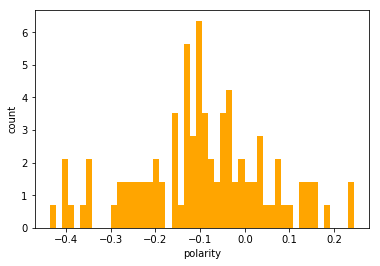

In [80]:
#Histogram of the Sentiment Scores of Amazon.com Inc.
import matplotlib.pyplot as plt
plt.hist(amazon_joined['daily_sentiment'],color='orange',bins=50,normed=True)
plt.ylabel('count')
plt.xlabel('polarity')